In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def soft_sign(x, eps=1e-7):
  if abs(x) > eps:
    return np.sign(x)
  return x / eps


np_soft_sign = np.vectorize(soft_sign)

class MyLassoRegression(object):
  def __init__(self, C=1):
    self.intercept_ = None
    self.coef_ = None
    self.C = C

  def regularization_term(self, weights):
    signs = np_soft_sign(weights)
    signs[0] = 0
    return signs

  def grad(self, X, y, weights):
    basic_term = 1. / X.shape[0] * (X.T @ (X @ weights - y))
    regularization_term = self.regularization_term(weights)

    return basic_term + self.C * regularization_term

  def fit(self, X, y, max_iter=100, lr=0.1):
    X = np.array(X)
    y = np.array(y)

    X = np.hstack([np.ones([X.shape[0], 1]), X])
    l, n = X.shape

    weights = np.random.randn(n)

    losses = []

    for iter in range(max_iter):
      y_pred = (X @ weights.reshape(n, 1)).ravel()
      grad = self.grad(X, y, weights)
      weights -= grad * lr / ((iter + 1) ** 0.5)

      loss = np.mean((X @ weights - y) ** 2) + self.C * np.sum(np.abs(weights[1:]))
      losses.append(loss)

    self.coef_ = weights[1:]
    self.intercept_ = weights[0]

    return losses

  def predict(self, X):
    X = np.array(X)
    y_pred = X @ self.coef_ + self.intercept_
    return y_pred

In [3]:
def linear_expression(x):
    return 5 * x + 6

In [4]:
from sklearn.model_selection import train_test_split

objects_num = 50
X = np.linspace(-5, 5, objects_num)
y = linear_expression(X) + np.random.randn(objects_num) * 5

# выделим половину объектов на тест
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

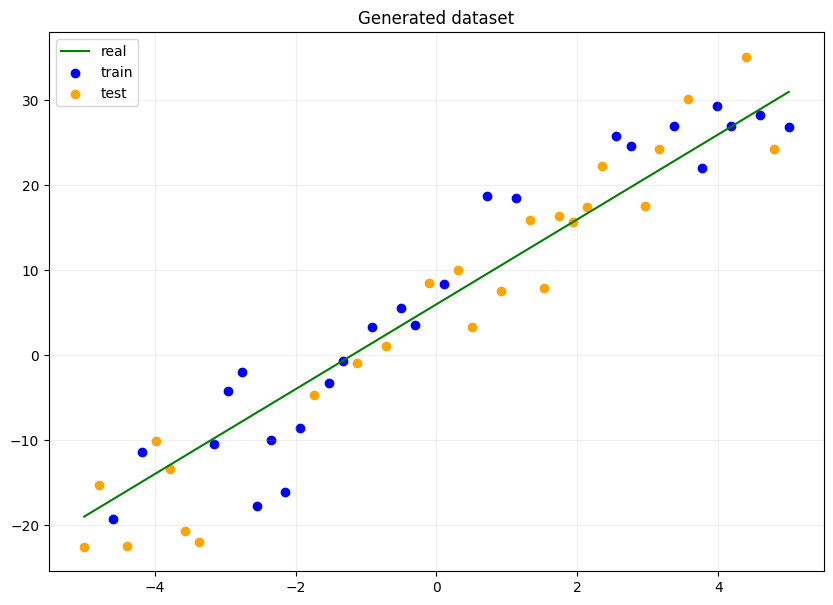

In [5]:
plt.figure(figsize=(10, 7))
plt.plot(X, linear_expression(X), label='real', c='g')
plt.scatter(X_train, y_train, label='train', c='b')
plt.scatter(X_test, y_test, label='test', c='orange')

plt.title("Generated dataset")
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [8]:
regressor = MyLassoRegression()

losses = regressor.fit(X_train[:, np.newaxis], y_train)

predictions = regressor.predict(X_test[:, np.newaxis])

In [9]:
regressor.coef_, regressor.intercept_

(array([5.2621088]), 5.5067531928522095)

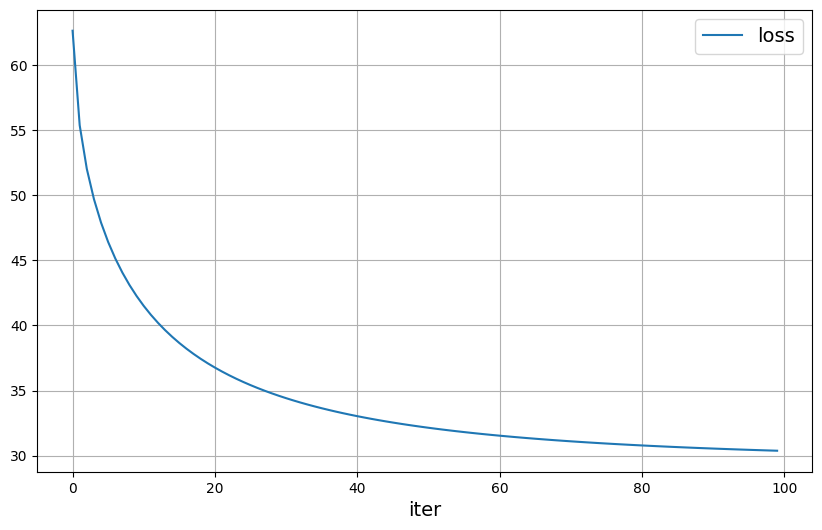

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(losses, label='loss')
plt.legend(fontsize=14)
plt.xlabel('iter', fontsize=14)
plt.grid()

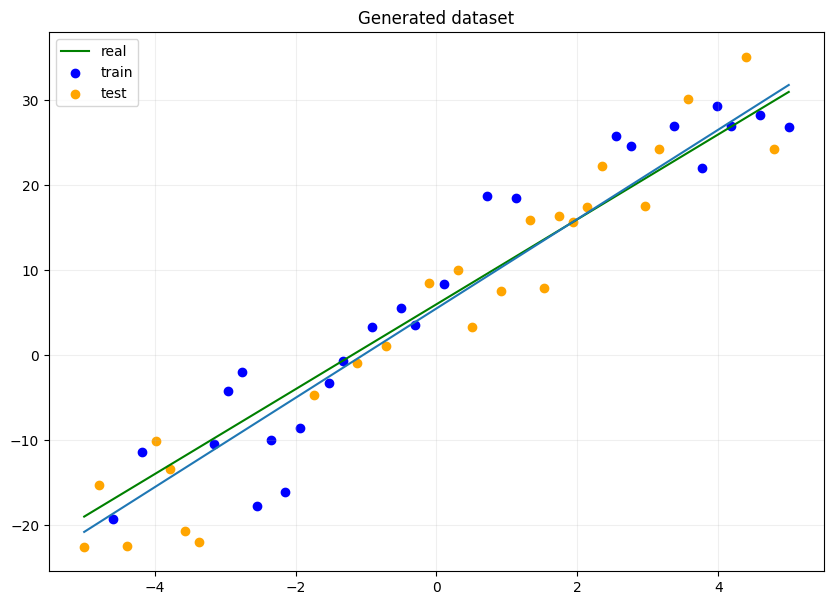

In [11]:
plt.figure(figsize=(10, 7))
plt.plot(X, linear_expression(X), label='real', c='g')
plt.plot(X, regressor.predict(X[:, np.newaxis]))

plt.scatter(X_train, y_train, label='train', c='b')
plt.scatter(X_test, y_test, label='test', c='orange')

plt.title("Generated dataset")
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [17]:
import pandas as pd

import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

target = raw_df.values[1::2, 2]

In [19]:
X = pd.DataFrame(data)
y = target

X.describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
model = MyLassoRegression(C=0.001)
losses = model.fit(X_train_scaled, y_train)

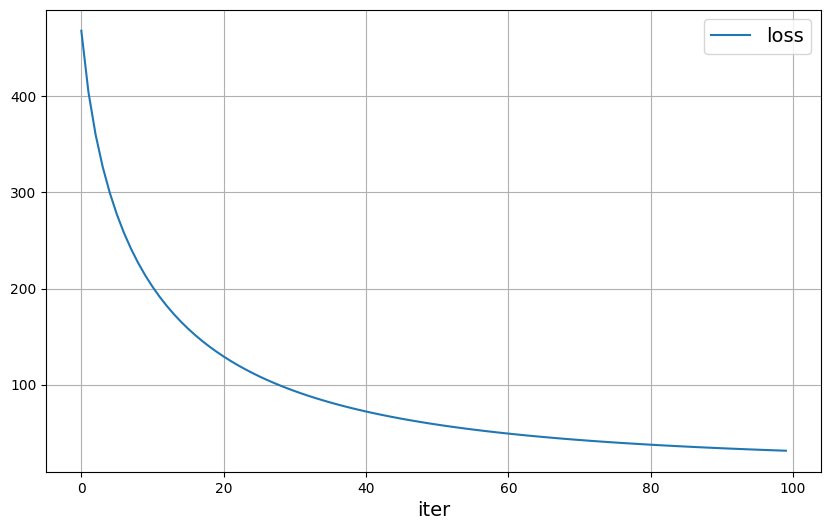

In [23]:
plt.figure(figsize=(10,6))
plt.plot(losses, label='loss')
plt.legend(fontsize=14)
plt.xlabel('iter', fontsize=14)
plt.grid()

<BarContainer object of 13 artists>

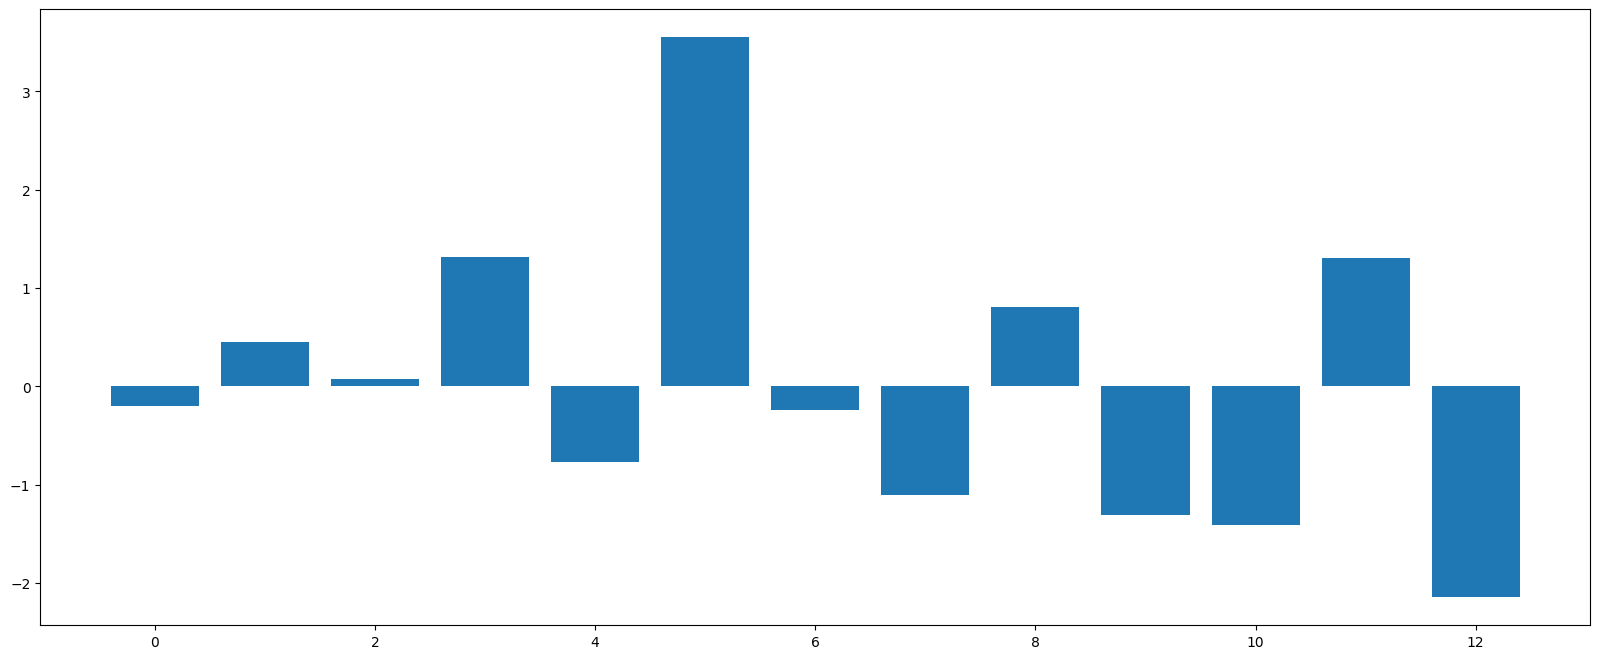

In [24]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_train_prediction = model.predict(X_train_scaled)
y_test_prediction = model.predict(X_test_scaled)

print(f'Train MSE: {mean_squared_error(y_train, y_train_prediction)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_prediction)}')

Train MSE: 31.17421891398943
Test MSE: 57.29718754911486


In [27]:
model.coef_, model.intercept_

(array([-0.19655134,  0.45445193,  0.07794981,  1.31596159, -0.77238802,
         3.55102508, -0.23933363, -1.10713935,  0.80858371, -1.31104335,
        -1.41499991,  1.30447486, -2.14632644]),
 18.60270678255216)

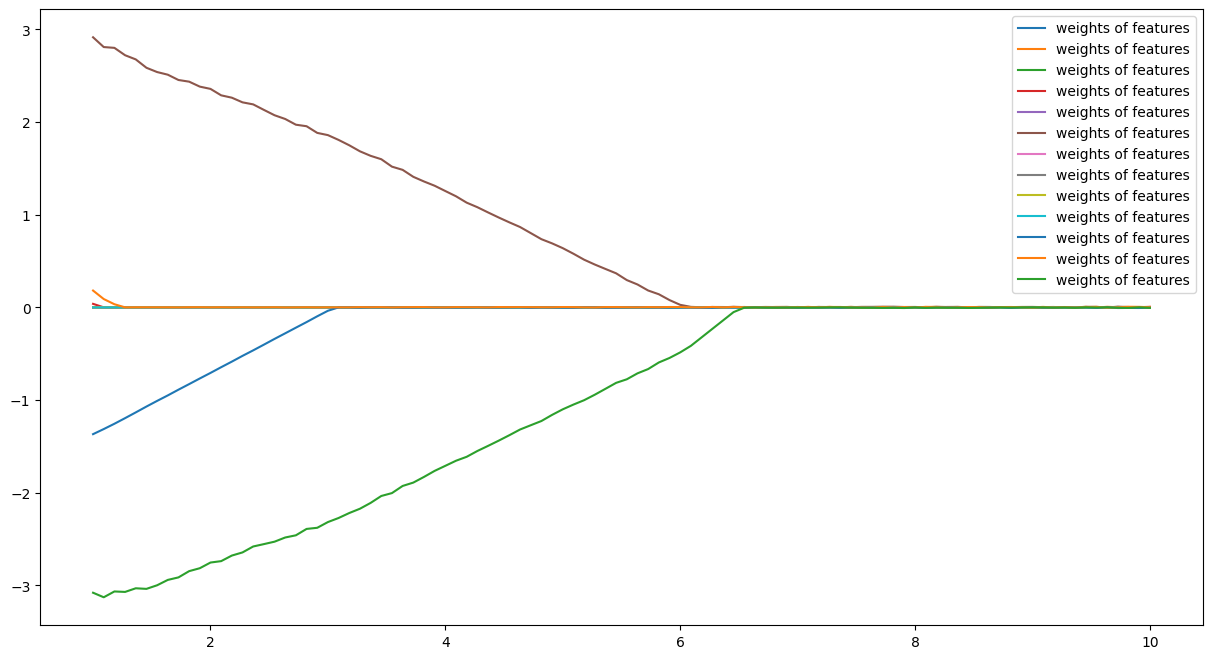

In [32]:
reg_coefs = np.linspace(1, 10, 100)

weights = np.empty((len(X.columns), 0))

for C in reg_coefs:
  lasso_regressor = MyLassoRegression(C=C)
  lasso_regressor.fit(X_train_scaled, y_train, lr=0.05, max_iter=10000)
  weights = np.hstack((weights, lasso_regressor.coef_.reshape(-1, 1)))

plt.figure(figsize=(15, 8))
plt.plot(reg_coefs, weights.T, label='weights of features')
plt.legend()
plt.show()


In [31]:
from sklearn.linear_model import Lasso


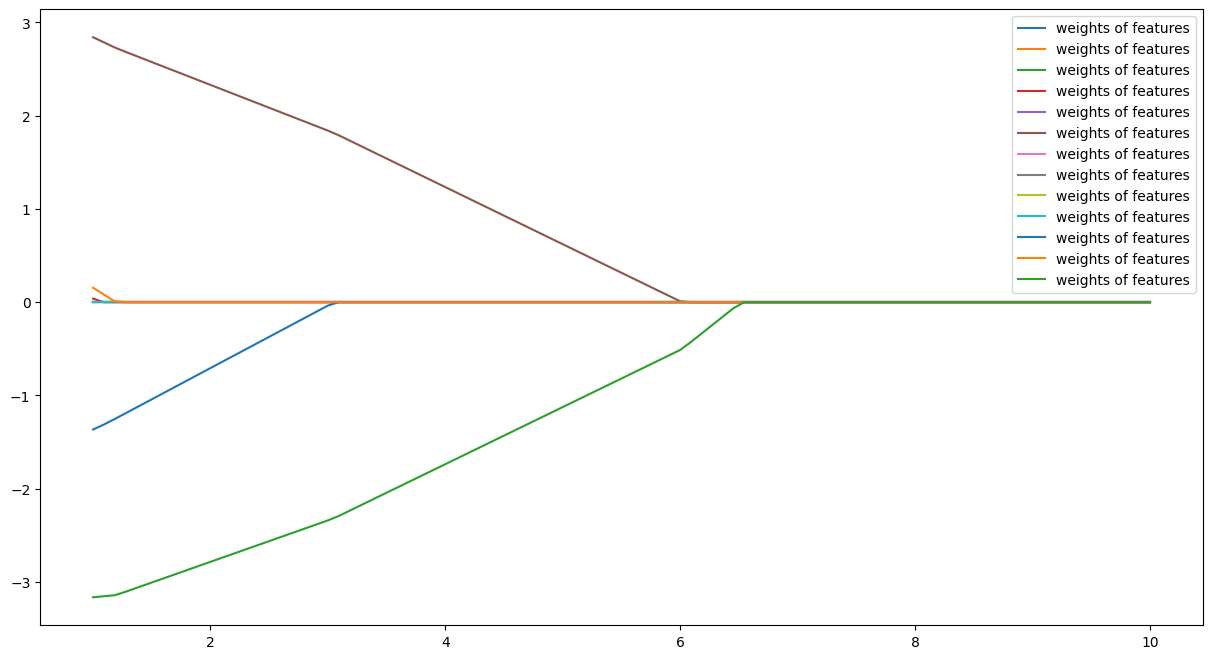

In [34]:
reg_coefs = np.linspace(1, 10, 100)

weights = np.empty((len(X.columns), 0))

for C in reg_coefs:
  lasso_regressor = Lasso(alpha=C)
  lasso_regressor.fit(X_train_scaled, y_train)
  weights = np.hstack((weights, lasso_regressor.coef_.reshape(-1, 1)))

plt.figure(figsize=(15, 8))
plt.plot(reg_coefs, weights.T, label='weights of features')
plt.legend()
plt.show()

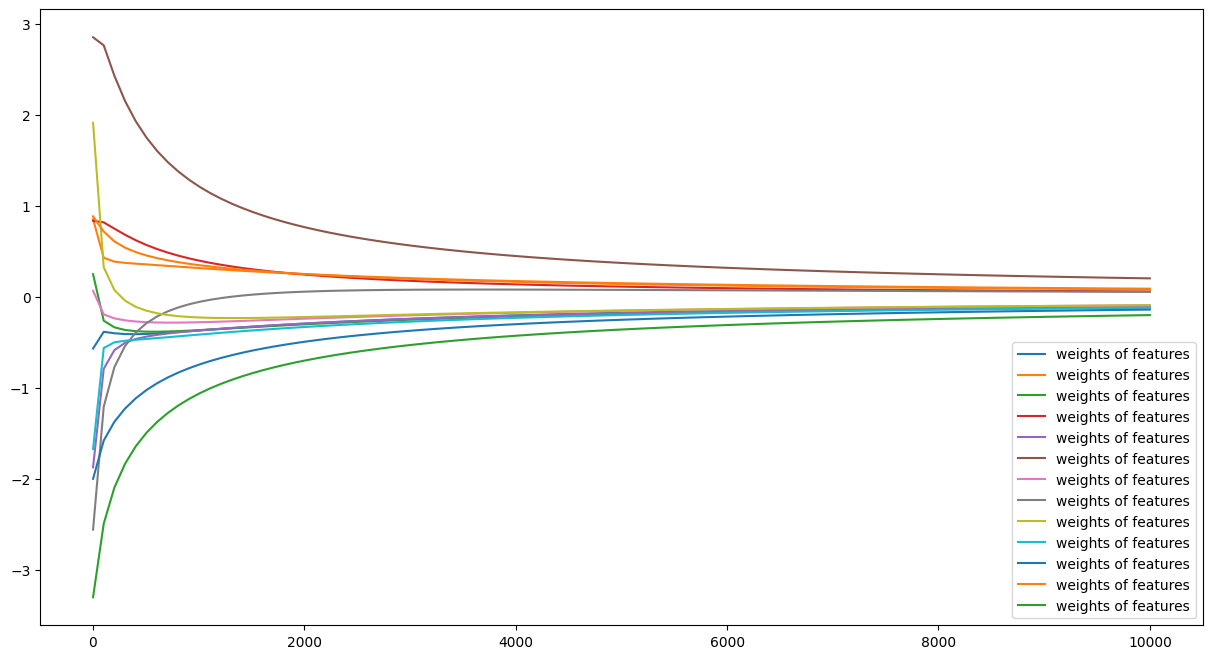

In [35]:
from sklearn.linear_model import Ridge

reg_coefs = np.linspace(1, 10000, 100)

weights = np.empty((len(X.columns), 0))
for C in reg_coefs:
    ridge_regressor = Ridge(C)
    ridge_regressor.fit(X_train_scaled, y_train)
    weights = np.hstack((weights, ridge_regressor.coef_.reshape(-1, 1)))


plt.figure(figsize=(15,8))
plt.plot(reg_coefs, weights.T, label='weights of features')
plt.legend()
plt.show()